In [3]:
import os
import json
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# The manipulation and extraction procedures of the .json files obtained from Sonar output is copied from
# https://github.com/fga-eps-mds/Analytics, developed by Gabriel Filipe Manso in context of teacher assistant activities
# in EPS and MDS courses in 2020.2 academic period, under supervising by prof. Hilmer R. Neri in University of Brazilia,
# Faculty of Gama- Software Engineering graduate course.
# https://github.com/fga-eps-mds/A-Disciplina-MDS-EPS/blob/master/PlanosDeEnsino/EPS-cronograma-2020-2-hrn.md
# https://github.com/fga-eps-mds/A-Disciplina-MDS-EPS/blob/master/PlanosDeEnsino/MDS-cronograma-hrn.md

%config InlineBackend.figure_format ='retina'

sns.set(font_scale=1.5)

sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [6]:
jsons = glob('siged-raw-data-08-05-2021/*.json')

In [7]:
jsons

['siged-raw-data-08-05-2021/fga-eps-mds-2020-2-SiGeD-Sectors-date_v1.0.json',
 'siged-raw-data-08-05-2021/fga-eps-mds-2020-2-SiGeD-Frontend-date_v0.10.2.json',
 'siged-raw-data-08-05-2021/fga-eps-mds-2020-2-SiGeD-Demands-date_v1.3.0.json',
 'siged-raw-data-08-05-2021/fga-eps-mds-2020-2-SiGeD-Frontend-date_v0.7.json',
 'siged-raw-data-08-05-2021/fga-eps-mds-2020-2-SiGeD-Frontend-date_v1.9.1.json',
 'siged-raw-data-08-05-2021/fga-eps-mds-2020-2-SiGeD-Frontend-date_v1.5.1.json',
 'siged-raw-data-08-05-2021/fga-eps-mds-2020-2-SiGeD-Users-date_v1.0.1.json',
 'siged-raw-data-08-05-2021/fga-eps-mds-2020-2-SiGeD-Demands-date_v0.1.json',
 'siged-raw-data-08-05-2021/fga-eps-mds-2020-2-SiGeD-Frontend-date_v1.7.0.json',
 'siged-raw-data-08-05-2021/fga-eps-mds-2020-2-SiGeD-Frontend-date_v1.7.1.json',
 'siged-raw-data-08-05-2021/fga-eps-mds-2020-2-SiGeD-Users-date_v1.0.0.json',
 'siged-raw-data-08-05-2021/fga-eps-mds-2020-2-SiGeD-Frontend-date_v1.5.0.json',
 'siged-raw-data-08-05-2021/fga-eps-mds-20

In [8]:
def read_json(json_path):

    with open(json_path) as json_file:
        json_obj = json.load(json_file)

    return json_obj

In [9]:
def create_base_component_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"SiGeD-(.*?)-date_(.*?).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [10]:
base_component_df = create_base_component_df(jsons)

In [11]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
576,files,8,NaN,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
577,ncloc,413,NaN,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
578,functions,32,NaN,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
579,complexity,45,NaN,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
580,security_rating,1.0,True,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
581,reliability_rating,1.0,True,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
582,comment_lines_density,0.0,False,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
583,duplicated_lines_density,0.0,True,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
552,files,8,NaN,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.1.json,Clients,V1.0.1
553,ncloc,483,NaN,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.1.json,Clients,V1.0.1


In [12]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [13]:
def metric_per_file(json):

    file_json = []

    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)

    return file_json

In [14]:
def generate_file_dataframe(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

In [15]:
def create_file_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)

        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe(metric_list, file_component_data, language_extension = 'js')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"SiGeD-(.*?)-date_(.*?).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [16]:
file_component_df = create_file_df(jsons)

file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
4288,tests/api.test.js,8,8,0.0,0.0,NaN,120,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
4289,src/Controllers/ClientController.js,6,11,0.0,0.0,NaN,91,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
4290,src/Models/ClientSchema.js,0,0,0.0,0.0,NaN,51,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
4291,src/utils/functionsJWS.js,2,4,0.0,0.0,NaN,16,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
4292,src/index.js,3,3,0.0,0.0,NaN,28,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
4293,scripts/release.js,7,8,0.0,0.0,NaN,61,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
4294,src/routes.js,0,0,0.0,0.0,NaN,10,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
4295,src/utils/validate.js,6,11,0.0,0.0,NaN,36,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.0.json,Clients,V1.0.0
4038,tests/api.test.js,14,14,0.0,0.0,NaN,190,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.1.json,Clients,V1.0.1
4039,src/Controllers/ClientController.js,6,11,0.0,0.0,NaN,91,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020-2-SiGeD-Clients-date_V1.0.1.json,Clients,V1.0.1


In [17]:
clients_df = file_component_df[file_component_df['repository'] == 'Clients']
demands_df = file_component_df[file_component_df['repository'] == 'Demands']
frontend_df = file_component_df[file_component_df['repository'] == 'Frontend']
sectors_df = file_component_df[file_component_df['repository'] == 'Sectors']
users_df = file_component_df[file_component_df['repository'] == 'Users']

In [25]:
clients_df.loc[:, ('complexity/functions')]  = clients_df.loc[:, ('complexity')].astype(float) /\
                                               clients_df.loc[:, ('functions')].astype(float)
demands_df.loc[:, ('complexity/functions')] = demands_df.loc[:, ('complexity')].astype(float) /\
                                              demands_df.loc[:, ('functions')].astype(float)
sectors_df.loc[:, ('complexity/functions')] = sectors_df.loc[:, ('complexity')].astype(float) /\
                                              sectors_df.loc[:, ('functions')].astype(float)
frontend_df.loc[:, ('complexity/functions')] = frontend_df.loc[:, ('complexity')].astype(float) /\
                                               frontend_df.loc[:, ('functions')].astype(float)
users_df.loc[:, ('complexity/functions')] = users_df.loc[:, ('complexity')].astype(float) /\
                                            users_df.loc[:, ('functions')].astype(float)

#printing the average CC per function descriptive statistics in frontend repository
frontend_df['complexity/functions'].describe()

/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


count    2831.000000
mean        1.430234
std         0.823794
min         1.000000
25%         1.000000
50%         1.142857
75%         1.555556
max         7.000000
Name: complexity/functions, dtype: float64

In [26]:
# Defining measure em1 calculation, where em1 = density of non-complex file
def em1(df):
    m0 = np.median(df['complexity/functions'])
    m1 = df['complexity'].astype(float)
    m2 = df['functions'].astype(float)
    m3 = len(df)

    #  intervals for em1 thresholds
    x = np.array([0, m0])
    y = np.array([1, 0])

    # Defining intervals for em1 interpretation(numeric interpolation). It indicates quality score
    IF1 = np.interp(list(((m1/m2) <= m0)[(m2 > 0)]),x, y)

    em1 = sum(IF1)/m3

    return em1

In [ ]:
def em2(df):

    # Defining metrics for measure em2, where em2 = density of commented files
    m3 = len(df)
    m4 = df['comment_lines_density'].astype(float)

    #  intervals for em1 interpretation
    x = np.array([0.1, 0.3])
    y = np.array([1, 0])

    #(m4 >= 0.1 and m4 <= 0.3)

    # Defining intervals for em2 interpretation(numeric interpolation). It indicates quality score
    em2i = []
    for if2i in m4:
        if 10 <= if2i <= 30:
            em2i.append(np.interp(if2i/100,x, y))
        else:
            em2i.append(0)

    em2 = np.sum(em2i)/m3

    return em2

In [29]:
def create_metrics_df(df):

    version_vec = df['version'].unique()

    em1_list = []
    repository_list = []
    version_list = []

    metrics_df = pd.DataFrame()

    for version in version_vec:

        version_df = df[df['version'] == version]

        em1_list.append(em1(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)

    metrics_df = pd.DataFrame({'em1': em1_list,
                               'repository': repository_list,
                               'version': version_list})

    return metrics_df

In [30]:
frontend_metrics = create_metrics_df(frontend_df)
frontend_metrics

,em1,repository,version
0,0.666667,Frontend,v0.1
1,0.666667,Frontend,v0.10.0
2,0.666667,Frontend,v0.10.1
3,0.649573,Frontend,v0.10.2
4,0.647059,Frontend,v0.11.0
5,0.647059,Frontend,v0.11.1
6,0.647059,Frontend,v0.12.0
7,0.650000,Frontend,v0.13.0
8,0.650000,Frontend,v0.14.0
9,0.661157,Frontend,v0.14.1


(0.625, 0.7)

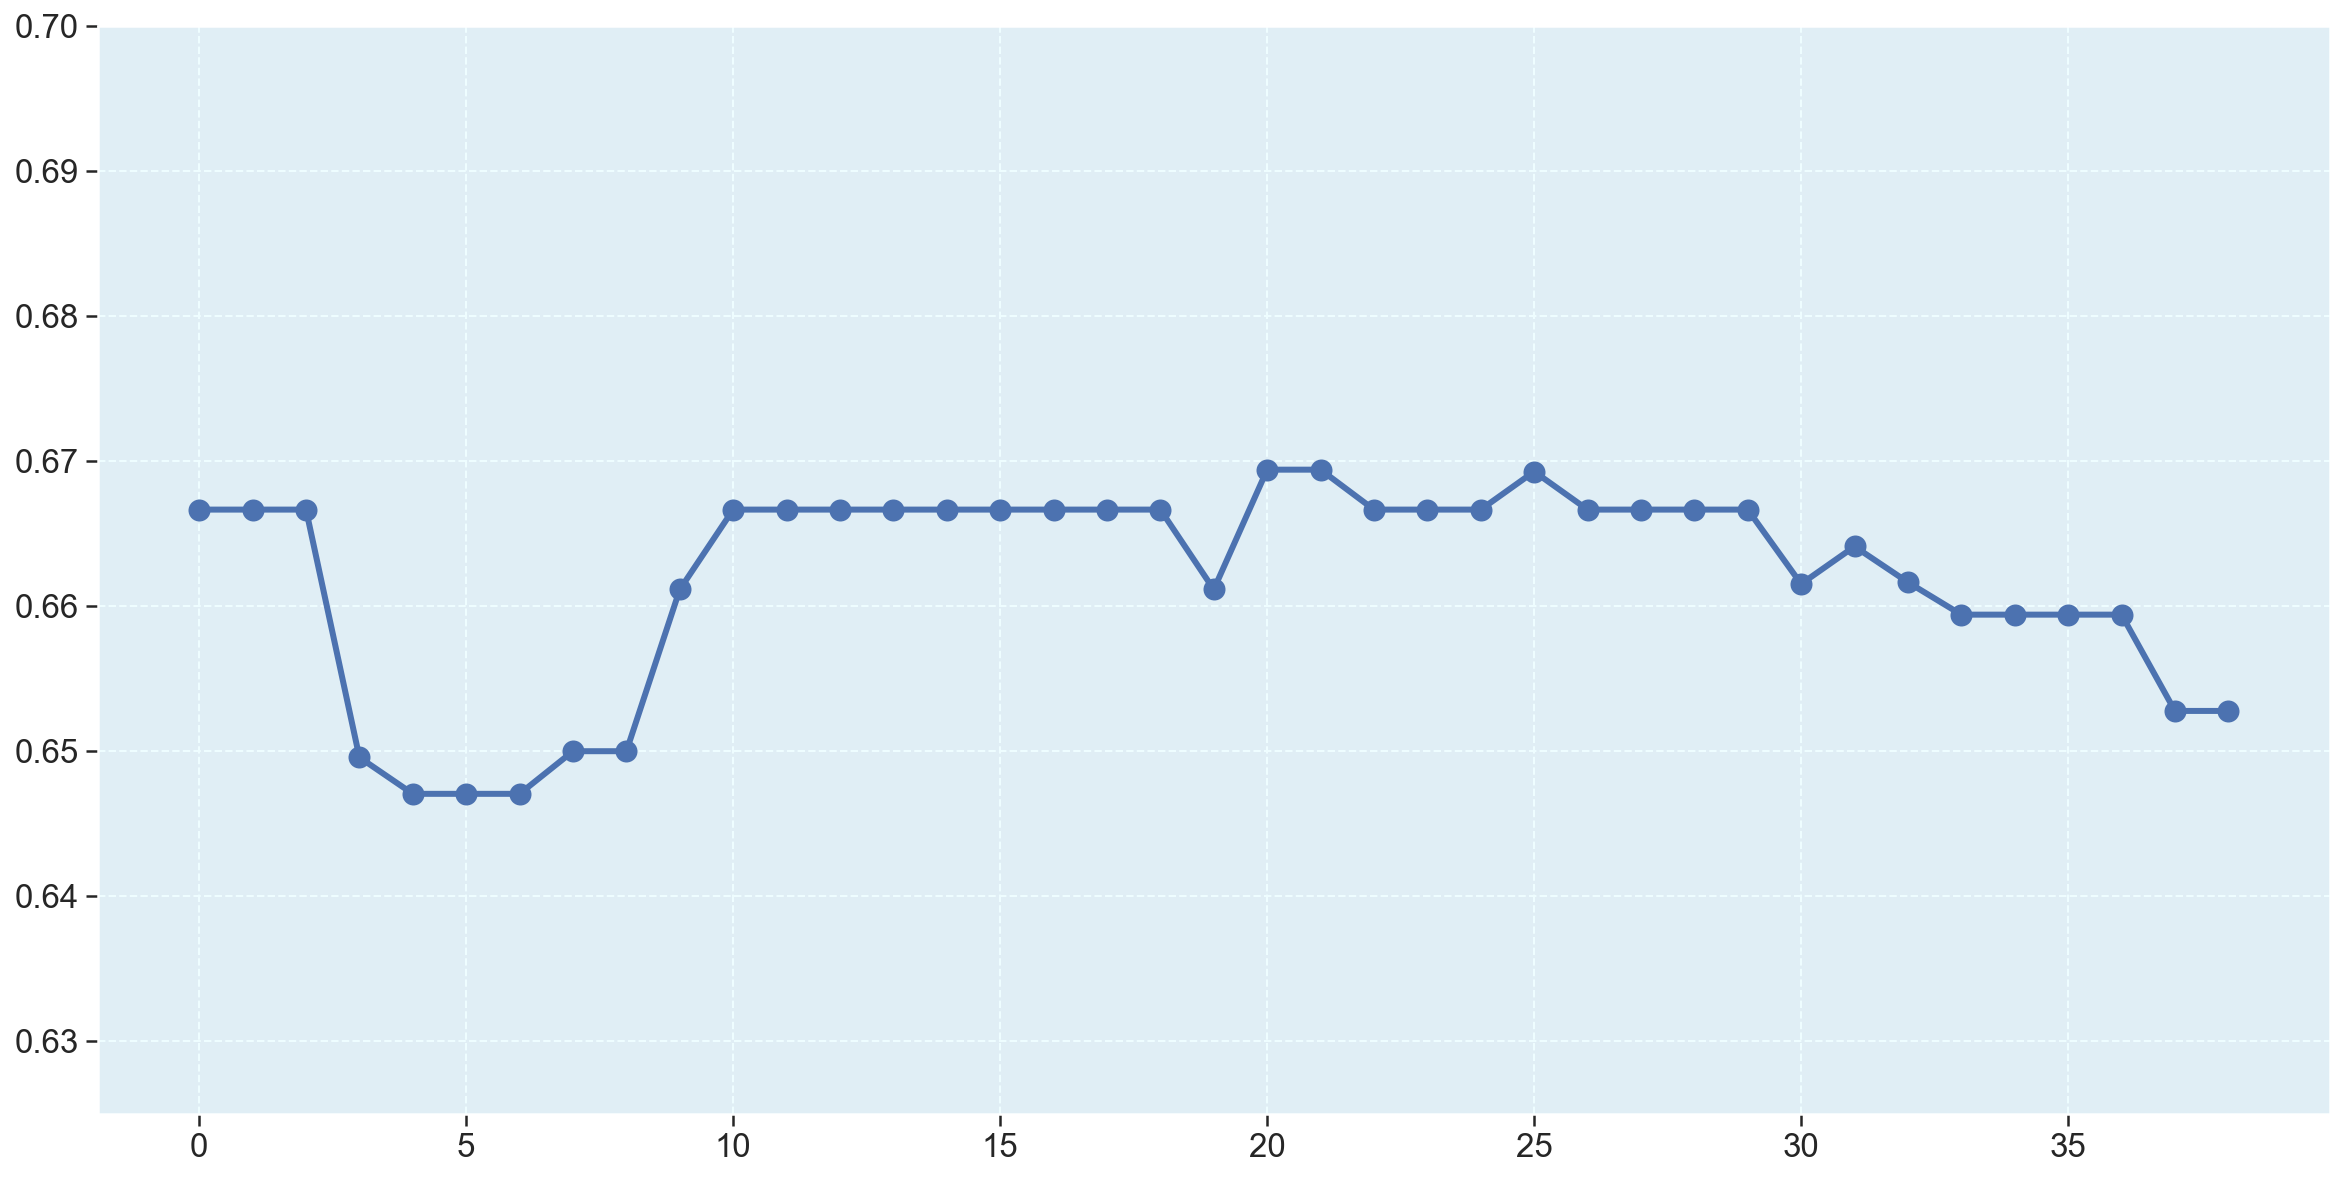

In [31]:
# Plotting em1 in frontend repository

fig = plt.figure(figsize=(20, 10))

plt.plot(frontend_metrics['em1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.625,.7, color="#c9f9ff", alpha=0.3)

plt.ylim(.625,.7)
